<a href="https://colab.research.google.com/github/hw-tan/Capstone-Project/blob/main/1_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will conduct data cleaning, data pre-processing and exploratory data analysis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
import os
import gc
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
# Settings
pd.options.display.max_colwidth = 500

### EDA

Provided in the Shopee Kaggle file is

1) Train dataset

2) Test dataset

3) Train_images

4) Test_images

5) Sample submission

### Train dataset

|feature name|description|
|---|---|
|posting id| Unique id of item|
|image|jpg file associated with item|
|image_phash|Perceptual hash of image|
|title| Item description|
|label_group|Label for group that item belongs to|

In [ ]:
directory = '/content/drive/MyDrive/Capstone/'

In [ ]:
# Load train dataset
train = pd.read_csv(directory + 'Data/train.csv')

In [ ]:
# Check first 5 rows
train.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DOUBLE FOAM TAPE",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Campur - Leher Kancing (DPT001-00) Batik karakter Alhadi,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [ ]:
# Check for null
train.isnull().sum()

posting_id     0
image          0
image_phash    0
title          0
label_group    0
dtype: int64

Dataset is complete with no null values

#### Unique values

In [ ]:
# Function to check for unique values
def checkunique(df):
    for col in df.columns:
        print(f'{col}: {len(df[col].unique())} unique values')
        
checkunique(train)

posting_id: 34250 unique values
image: 32412 unique values
image_phash: 28735 unique values
title: 33117 unique values
label_group: 11014 unique values


34250 unique item listings. 

32412 images, some item listing have duplicate images.

28735 phash, some images are different files but the same image.

33117 titles, some item listings have duplicate titles.

### Label

In [ ]:
train.groupby('label_group')['posting_id'].count().sort_values()

label_group
1471548468     2
3381177724     2
1934657835     2
3381497963     2
1932824351     2
              ..
994676122     51
3113678103    51
562358068     51
3627744656    51
159351600     51
Name: posting_id, Length: 11014, dtype: int64

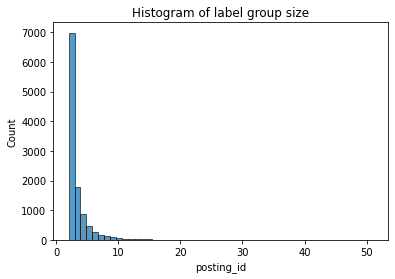

In [ ]:
plt.title('Histogram of label group size')
sns.histplot(train.groupby('label_group')['posting_id'].count().sort_values(),bins=51);

In [ ]:
# Create dictionary of items by label group
label_dict = train.groupby('label_group')['posting_id'].unique().to_dict()

# Create list of matching products
train['matches'] = train['label_group'].map(label_dict)

In [ ]:
train[train['matches'].map(lambda x : len(x)) == 2].shape[0]/train.shape[0]

0.40753284671532847

### Image

There are 32412 unique images in the train dataset.

In [ ]:
# Create new features with directory of image
train['filepath'] = train['image'].apply(lambda x: f'{directory}Data/train_images/{x}').values

In [ ]:
# Function to split string into multiple lines
def newline_str(string, characters):
    lines = []
    for i in range(0, len(string), characters):
        lines.append(string[i:i+characters])
    return '\n'.join(lines)

In [ ]:
# Function to create grid of images
def display_images(image_paths, description, row, col, title):
    figure, ax = plt.subplots(nrows = row, ncols = col, figsize = (16,16))
    ax = ax.ravel()
    for i, image_path in enumerate(image_paths):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax[i].set_title(newline_str(description[i],30))
        ax[i].imshow(image)
        ax[i].set_axis_off()
    plt.tight_layout()
    plt.show()

In [ ]:
def display_multiple_img(images_paths,description, rows, cols):
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,8) )
    for ind,image_path in enumerate(images_paths):
        image=cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        try:
            ax.ravel()[ind].set_title(newline_str(description.iloc[ind],30))
            ax.ravel()[ind].imshow(image)
            ax.ravel()[ind].set_axis_off()
            
        except:
            continue;
    plt.tight_layout()
    plt.show()

Looking at the first 9 images:

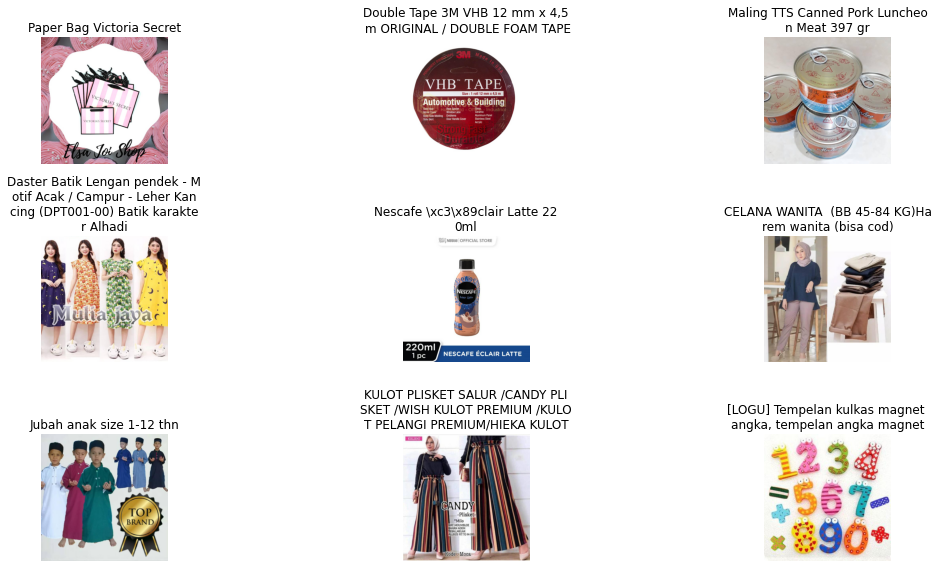

In [ ]:
# Display first 9 images
display_multiple_img(train['filepath'][0:9],train['title'][0:9],3,3)

Exploring images of the same item.

In [ ]:
train.groupby('label_group')['image'].count().sort_values()

label_group
1471548468     2
3381177724     2
1934657835     2
3381497963     2
1932824351     2
              ..
994676122     51
3113678103    51
562358068     51
3627744656    51
159351600     51
Name: image, Length: 11014, dtype: int64

In [ ]:
def display_multiple_img(images_paths, rows, cols):
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,8) )
    for ind,image_path in enumerate(images_paths):
        image=cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        try:
            ax.ravel()[ind].imshow(image)
            ax.ravel()[ind].set_axis_off()
        except:
            continue;
    plt.tight_layout()
    plt.show()

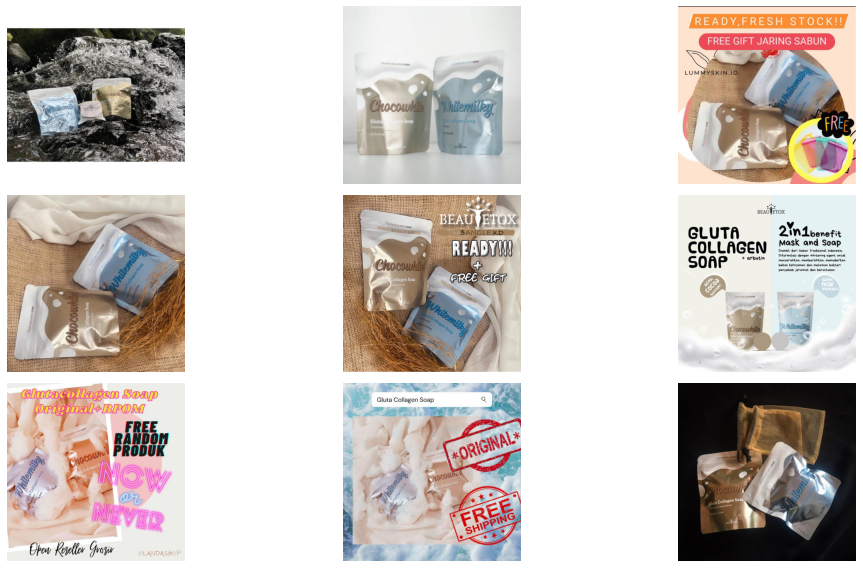

In [ ]:
display_multiple_img(
    train[train['label_group'] == 159351600]['filepath'].iloc[0:9],
    3,
    3,
    )

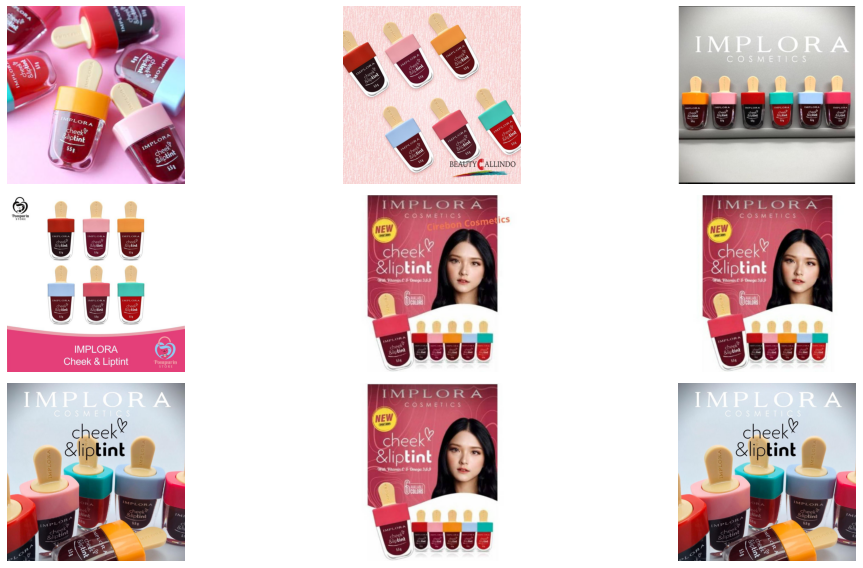

In [ ]:
display_multiple_img(
    train[train['label_group'] == 3627744656]['filepath'].iloc[0:9],
    3,
    3,
    )

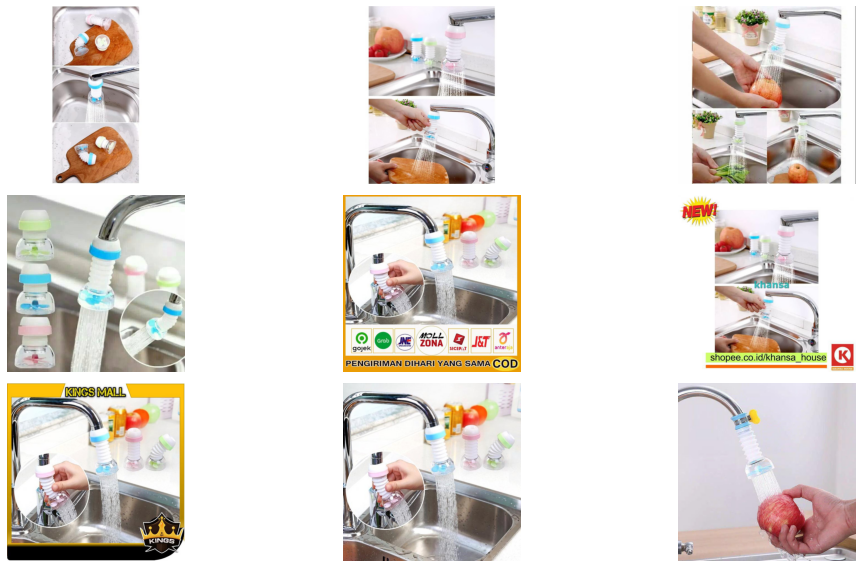

In [ ]:
display_multiple_img(
    train[train['label_group'] == 3113678103]['filepath'].iloc[0:9],
    3,
    3,
    )

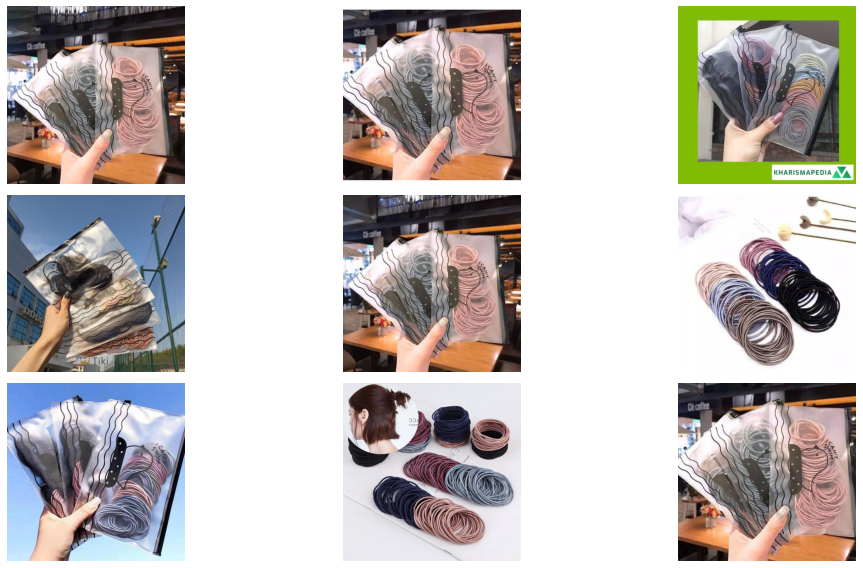

In [ ]:
display_multiple_img(
    train[train['label_group'] == 994676122]['filepath'].iloc[0:9],
    3,
    3,
    )

Titles

In [ ]:
# Get the length of documents
train['word_count'] = train['title'].map(lambda x: len(x.split()))

In [ ]:
train['word_count'].describe()

count    34250.000000
mean         9.414861
std          4.446719
min          1.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         61.000000
Name: word_count, dtype: float64

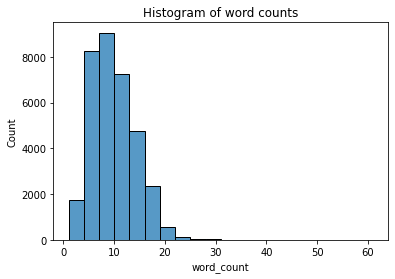

In [ ]:
plt.title('Histogram of word counts')
sns.histplot(train['word_count'],bins=20);

##### Unigram

In [ ]:
# Function to get top n words

def get_top_unigram(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
top_unigram = get_top_unigram(train['title'], 10)

In [ ]:
for word, freq in top_unigram:
  print(f'{word} - {freq}')

anak - 2056
wanita - 1903
original - 1823
murah - 1459
tas - 1306
pria - 1188
masker - 1166
dan - 1159
bayi - 1129
ml - 1102


From the top 10 unigram, we see a few catagories of words:

1) User descriptor: anak (child), wanita (woman), pria(men), bayi (baby)

2) Item descriptor: murah(inexpensive), original, ml

3) Item: tas (bag), masker (face mask), 

4) Common words: dan (and)


What should be noted is that the documents include a mix of English and Bahasa. When removing for stopwords, we will implement NLTK english and indonesian stopwords library.

In [ ]:
train[train['label_group'] == 3627744656]['title'][0:9].values

array(['IMPLORA CHEEK & LIPTINT - IMPLORA LIP TINT ORIGINAL BPOM',
       'IMPLORA CHEEK & LIPTINT', 'Lip Tint Implora Cheek & Liptint',
       'IMPLORA Cheek & Lip Tint Model Ice Cream - Set Liptint & Pemerah Pipi',
       '{Promo murah} Implora cheek&liptint',
       'Implora Cheek and Liptint/ Lip Tint implora',
       'IMPLORA CHEEK LIP TINT',
       'New cheek dan Liptint/ lip tint by IMPLORA bpom',
       'Implora Cheek & Liptint - Implora Liptint - Lip Tint Implora'],
      dtype=object)